In [7]:
'''Imports of libraries'''
from __future__ import print_function
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from tqdm import trange
from time import sleep

In [13]:
'''Needed functions '''
#Define a function that accepts a time array, a frequency, initial field strength and a phase angle and returns the array of motion of the electron 
def x_electron(time, frequency, E0, phase):
    #Define elementary charge
    e=1
    #Define electron mass
    me=1

    #Write equation
    return ((-e*E0)/(frequency**2*me))*(np.cos(frequency*time + phase) + frequency*time*np.sin(phase) - np.cos(phase))

#Function for calculating the velocity of the electron at any time or phase
def vel_electron(time, phase, frequency, E0):
    #Define elementary charge
    e=1
    #Define electron mass
    me=1

    #Write equation
    return ((e*E0)/(frequency*me))*(np.sin(frequency*time + phase) - np.sin(phase))

#Function that finds the KE of the electron at any time or phase as a fraction of Up
def KE_electron(time, phase, frequency):
    return 2*(np.sin(frequency*time + phase) - np.sin(phase))**2

#For inspecting the validity of the classical region
def semi_classical(time, phase, frequency):
    return (np.sin(frequency*time + phase) - np.sin(phase))**3

#Define a function that contains only the variable dependent sections of x(t)
def electron_oscillations(t, phase, w):
    return np.cos(w*t+phase) + w*t*np.sin(phase) - np.cos(phase)

<IPython.core.display.Javascript object>


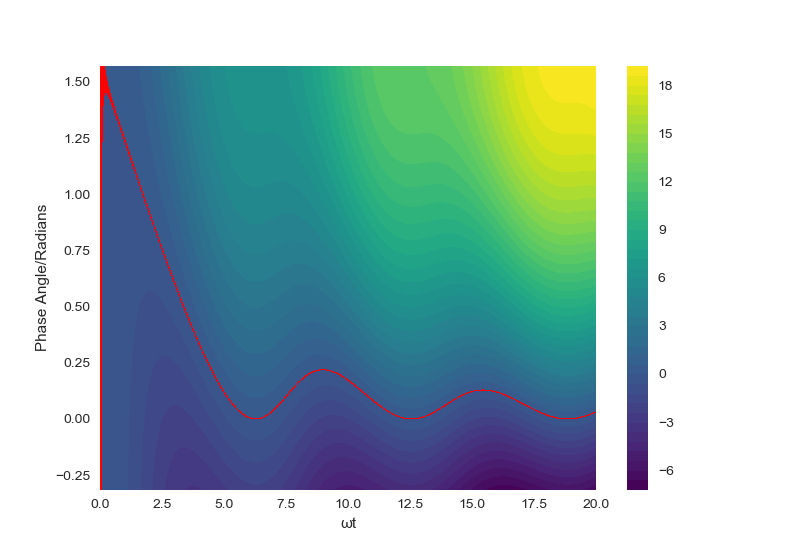

Text(0, 0.5, 'Phase Angle/Radians')

In [22]:
'''A contour plot that shows the dependence on t and the phase angle to find valid phases that give x(t)=0'''
#Define frequency of incident electric field based on wavelength
wl=800e-09
c=3e8
w=2*np.pi*(c/wl)

w0=1 #Choose the frequency to be 1 so all plots will be in wt instead of t

#Define the number of datapoints to be used 
dpoints=2000

#Run through different phase angles and times of equal size 
phase=np.linspace(-0.1*np.pi,0.5*np.pi, dpoints)
t=np.linspace(0,20, dpoints) #Time is on femtosecond scale

#Generate a grid of values for the contour plot
T, P = np.meshgrid(t, phase)
Z=electron_oscillations(T,P,w0) #z values of the contour plot
min_z=-0.001
max_z=0.001 #Define allowed thresholds for z to qualify as being 0. 

#Generate the contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(T,P, Z,50,cmap='viridis')
cp0 = ax.contourf(T,P, Z,[min_z,max_z],colors='red')
fig.colorbar(cp) #Add a colorbar to a plot
plt.xlabel('ωt')
plt.ylabel('Phase Angle/Radians')

<IPython.core.display.Javascript object>


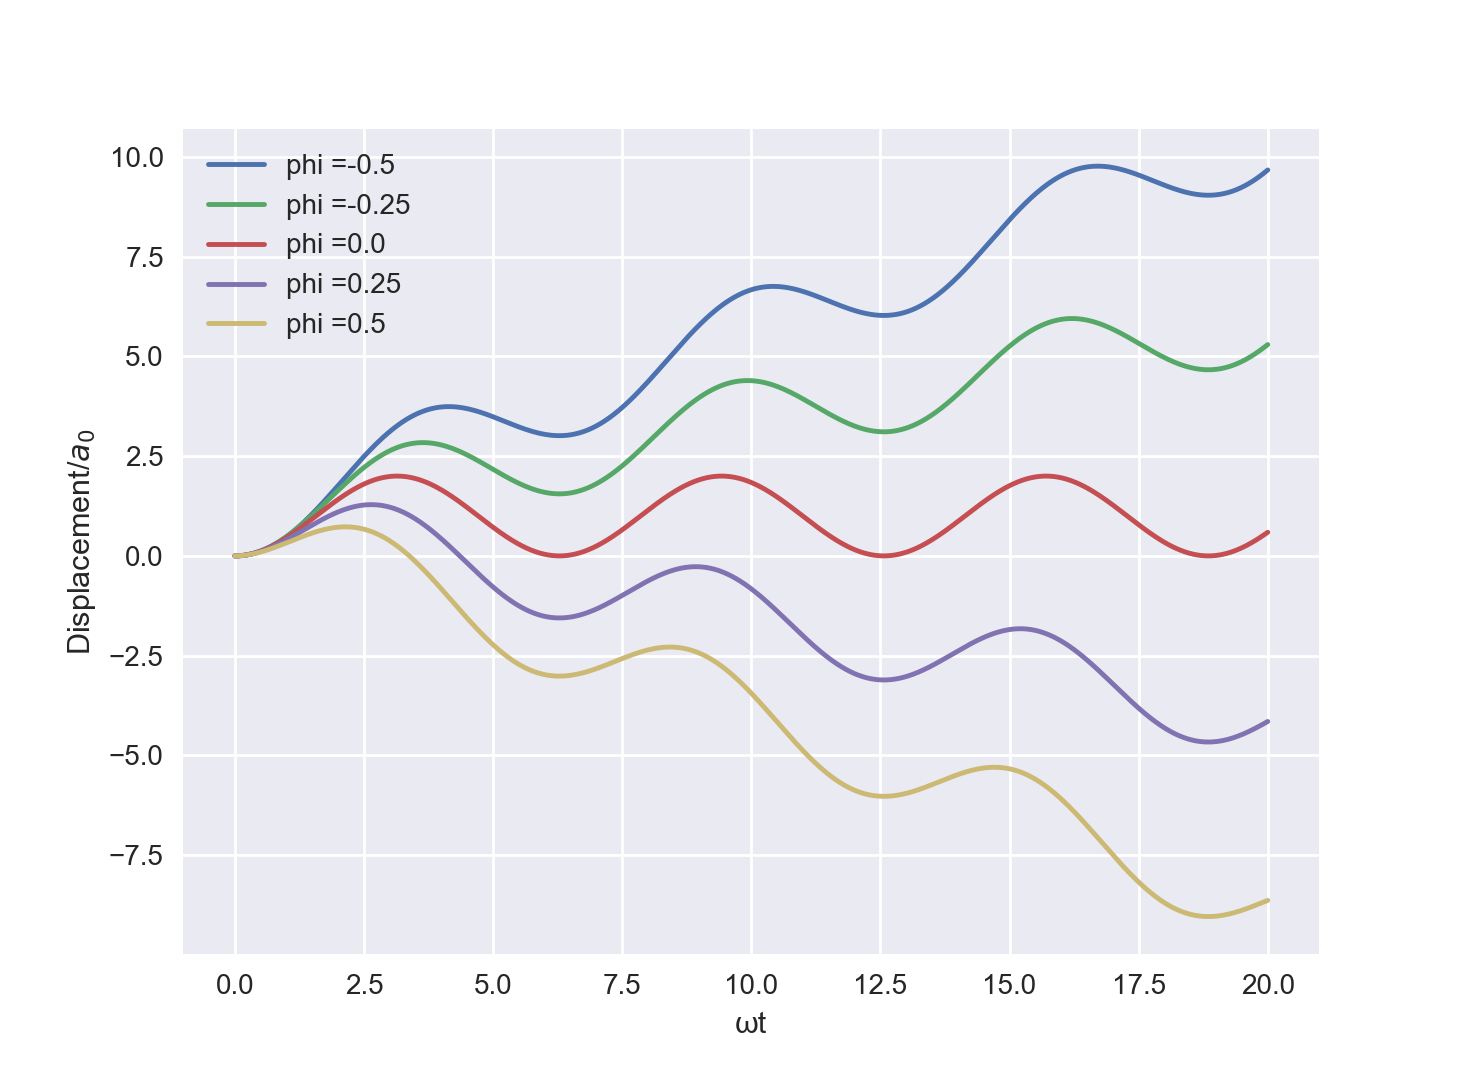

Text(0, 0.5, 'Displacement/$a_0$')

In [32]:
'''Now choose a section of phi values and investigate motion for them'''
#Choose the wanted phase angle range of phi
phi_index = 5 #How many phase angles will be investigated
phi=np.linspace(-0.5,0.5,phi_index) #Begin at 0 due to asymmetry in above plot

for phii in phi:
    x=x_electron(t,w0,1,phii)
    plt.plot(t,x, label='phi =%s' %phii)

plt.legend()
plt.xlabel('ωt')
plt.ylabel('Displacement/$a_0$')

100%|██████████| 2000/2000 [00:29<00:00, 67.15it/s]


<IPython.core.display.Javascript object>


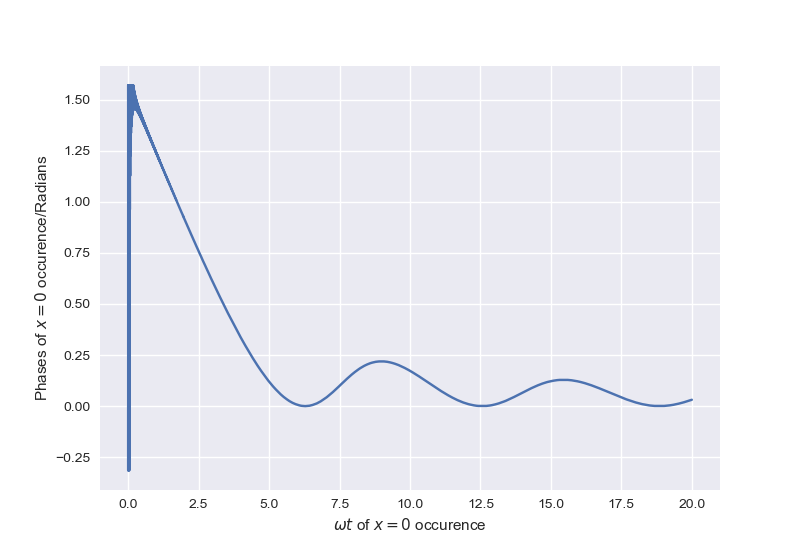

Text(0, 0.5, 'Phases of $x=0$ occurence/Radians')

In [16]:
'''Iterate through the T and P grid to find times and phases where x(t,p)=0'''
x0_values = np.array([[0,0]])

#Try parallesing this code to speed it up for higher data point amounts
for ii in trange(len(t)):
    for jj in range(len(phase)):
        z=electron_oscillations(t[ii],phase[jj],w0)
        if min_z<=z<=max_z:
            val=np.array([[t[ii], phase[jj]]])
            x0_values = np.append(x0_values, val, axis=0)

#Plot the results to make sure it matches the contour plot above
plt.plot(x0_values[:,0], x0_values[:,1])
plt.xlabel('$\omega t$ of $x=0$ occurence')
plt.ylabel('Phases of $x=0$ occurence/Radians')

<IPython.core.display.Javascript object>


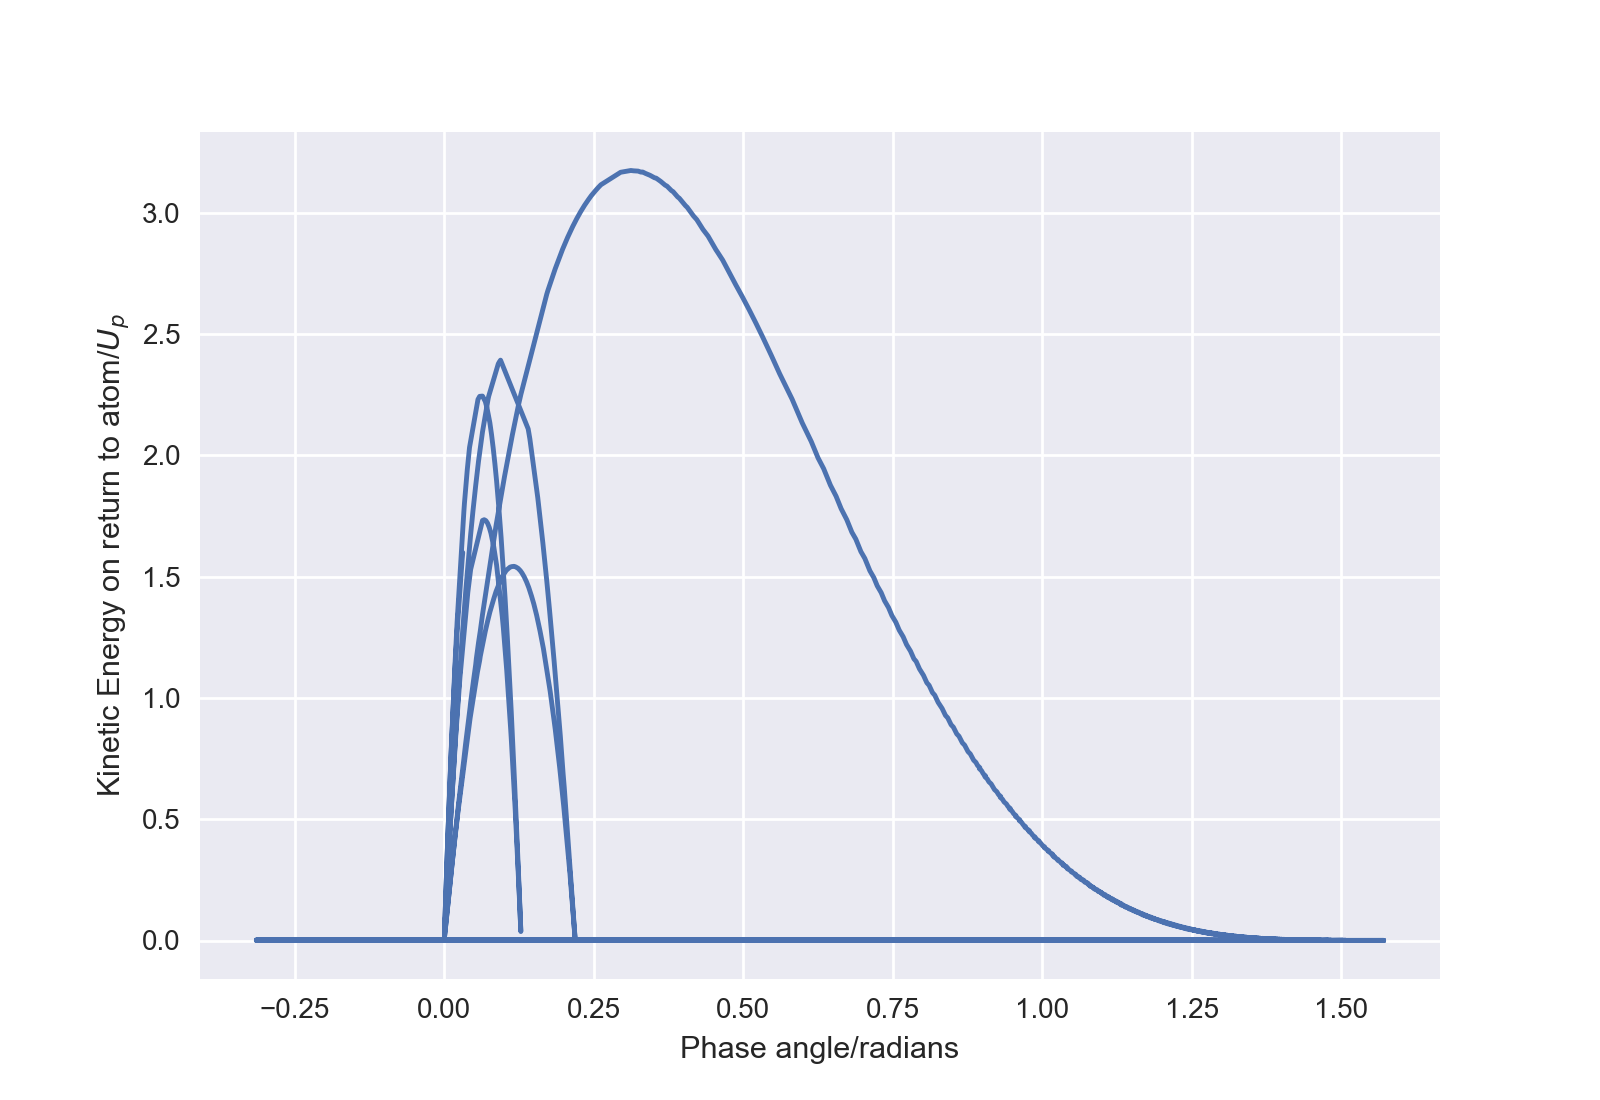

Text(0, 0.5, 'Kinetic Energy on return to atom/$U_p$')

In [33]:
'''Now calculate the KE of the electron as a function of the phase angle upon the electron's return to the atom.'''
return_energies_phase=KE_electron(x0_values[:,0], x0_values[:,1], w0)

#Plot the energies as a function of the phase angle 
plt.plot(x0_values[:,1], return_energies_phase)
plt.xlabel('Phase angle/radians')
plt.ylabel('Kinetic Energy on return to atom/$U_p$')


<IPython.core.display.Javascript object>


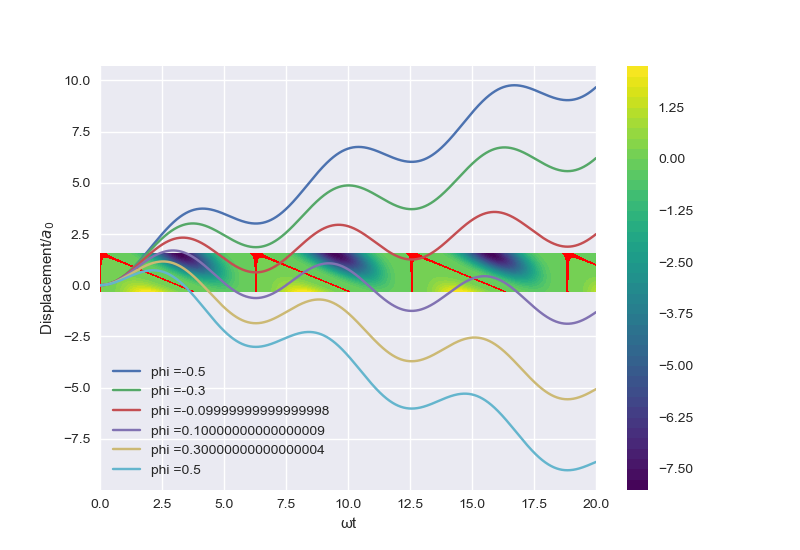

Text(0, 0.5, 'Phase Angle/Radians')

In [27]:
'''3D contour plot for checking the validity of the classical regime'''
#Generate a grid of values for the contour plot
T, P = np.meshgrid(t, phase)
Z=semi_classical(T,P,w0) #z values of the contour plot
min_z=-1e-5
max_z=1e-5 #Define allowed thresholds for z to qualify as being 0. 

#Generate the contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(T,P, Z,50,cmap='viridis')
cp0 = ax.contourf(T,P, Z,[min_z,max_z],colors='red')
fig.colorbar(cp) #Add a colorbar to a plot
plt.xlabel('ωt')
plt.ylabel('Phase Angle/Radians')

In [ ]:
#Combine the code for the appendix
'''Imports of libraries'''
from __future__ import print_function
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from tqdm import trange
from time import sleep


'''Needed functions '''
#Define a function that accepts a time array, a frequency, initial field strength and a phase angle and returns the array of motion of the electron 
def x_electron(time, frequency, E0, phase):
    #Define elementary charge
    e=1
    #Define electron mass
    me=1

    #Write equation
    return ((-e*E0)/(frequency**2*me))*(np.cos(frequency*time + phase) + frequency*time*np.sin(phase) - np.cos(phase))

#Function for calculating the velocity of the electron at any time or phase
def vel_electron(time, phase, frequency, E0):
    #Define elementary charge
    e=1
    #Define electron mass
    me=1

    #Write equation
    return ((e*E0)/(frequency*me))*(np.sin(frequency*time + phase) - np.sin(phase))

#Function that finds the KE of the electron at any time or phase as a fraction of Up
def KE_electron(time, phase, frequency):
    return 2*(np.sin(frequency*time + phase) - np.sin(phase))**2

#For inspecting the validity of the classical region
def semi_classical(time, phase, frequency):
    return (np.sin(frequency*time + phase) - np.sin(phase))**3

#Define a function that contains only the variable dependent sections of x(t)
def electron_oscillations(t, phase, w):
    return np.cos(w*t+phase) + w*t*np.sin(phase) - np.cos(phase)


'''A contour plot that shows the dependence on t and the phase angle to find valid phases that give x(t)=0'''
#Define frequency of incident electric field based on wavelength
wl=800e-09
c=3e8
w=2*np.pi*(c/wl)

w0=1 #Choose the frequency to be 1 so all plots will be in wt instead of t

#Define the number of datapoints to be used 
dpoints=2000

#Run through different phase angles and times of equal size 
phase=np.linspace(-0.1*np.pi,0.5*np.pi, dpoints)
t=np.linspace(0,20, dpoints) #Time is on femtosecond scale

#Generate a grid of values for the contour plot
T, P = np.meshgrid(t, phase)
Z=electron_oscillations(T,P,w0) #z values of the contour plot
min_z=-0.001
max_z=0.001 #Define allowed thresholds for z to qualify as being 0. 

#Generate the contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(T,P, Z,50,cmap='viridis')
cp0 = ax.contourf(T,P, Z,[min_z,max_z],colors='red')
fig.colorbar(cp) #Add a colorbar to a plot
plt.xlabel('ωt')
plt.ylabel('Phase Angle/Radians')


'''Now choose a section of phi values and investigate motion for them'''
#Choose the wanted phase angle range of phi
phi_index = 5 #How many phase angles will be investigated
phi=np.linspace(-0.5,0.5,phi_index) #Begin at 0 due to asymmetry in above plot

for phii in phi:
    x=x_electron(t,w0,1,phii)
    plt.plot(t,x, label='phi =%s' %phii)

plt.legend()
plt.xlabel('ωt')
plt.ylabel('Displacement/$a_0$')


'''Iterate through the T and P grid to find times and phases where x(t,p)=0'''
x0_values = np.array([[0,0]])

#Try parallesing this code to speed it up for higher data point amounts
for ii in trange(len(t)):
    for jj in range(len(phase)):
        z=electron_oscillations(t[ii],phase[jj],w0)
        if min_z<=z<=max_z:
            val=np.array([[t[ii], phase[jj]]])
            x0_values = np.append(x0_values, val, axis=0)

#Plot the results to make sure it matches the contour plot above
plt.plot(x0_values[:,0], x0_values[:,1])
plt.xlabel('$\omega t$ of $x=0$ occurence')
plt.ylabel('Phases of $x=0$ occurence/Radians')


'''Now calculate the KE of the electron as a function of the phase angle upon the electron's return to the atom.'''
return_energies_phase=KE_electron(x0_values[:,0], x0_values[:,1], w0)

#Plot the energies as a function of the phase angle 
plt.plot(x0_values[:,1], return_energies_phase)
plt.xlabel('Phase angle/radians')
plt.ylabel('Kinetic Energy on return to atom/$U_p$')